# **California Housing Price**

Sumber data California Housing Price : [here](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

### **Contents**

1. Business Problem Understanding
2. Data Understanding & EDA
3. Data Preprocessing
4. Modeling
5. Kesimpulan
6. Rekomendasi

****

## **BUSINESS PROBLEM UNDERSTANDING**

### **Context**

California adalah sebuah negara bagian di Amerika Serikat bagian barat. California berbatasan dengan Oregon di utara, Nevada dan Arizona di timur, negara bagian Baja California di Meksiko ke arah selatan; dan memiliki garis pantai sepanjang Samudra Pasifik ke arah barat. Dengan jumlah penduduk lebih dari 39,2 juta jiwa[5] dalam wilayah dengan total area sekitar 163.696 mil persegi (423.970 km2), California merupakan negara bagian Amerika Serikat yang terpadat menurut kepadatan penduduk dan terbesar ketiga berdasarkan wilayah.

Perekonomian yang maju menjadikan California sebagai kota dengan market properti yang paling mahal di Amerika Serikat.

### **Problem Statement**

Berdasarkan data dari [redfin](https://www.redfin.com/state/California/housing-market), harga median sebuah rumah sekarang di California sudah mencapai 739k USD, lebih dari dua kali harga nasional (370k USD). California memiliki empat dari lima pasar perumahan termahal di AS, yaitu Silicon Valley, San Francisco, Orange County, dan San Diego. Namun, tingkat kemiskinan, jika disesuaikan dengan biaya hidup, adalah yang terburuk di negara ini. California menyumbang 12% dari dari total populasi AS, tetapi seperempatnya merupakan tunawisma.

Dalam 5 tahun terakhir *supply* perumahan di pasar properti California mengalami penurunan, sedangkan tren untuk *demand* cenderung meningkat. Meskipun di awal tahun 2023 terdapat penurunan yang sangat drastis pada *demand*, tetapi grafik terus naik di bulan selanjutnya. Keadaan ini menyebabkan *house market bubble* sehingga harga rumah mencapai level yang tidak masuk akal, bahkan untuk penduduk dengan ekonomi menengah. Sebuah agen *real-estate*, [houzeo](https://www.houzeo.com/blog/california-real-estate-market/#housing-market-bubble), dalam artikel mereka mengatakan bahwa *house market bubble* memang sudah terjadi di California.

Selanjutnya, untuk menangani masalah ini sebuah perusahaan properti membuat plan untuk membangun perumahan baru untuk menambah *supply* di pasar. **Perusahaan ingin mendapatkan prediksi harga dari rumah yang akan dibangun sebagai pertimbangan untuk perencanaan biaya pembangunan dan perhitungan revenue yang didapat**.

### **Goal**

Berdasarkan problem tersebut, perusahaan tentu menginginkan ***`tool`* yang membantu dalam perhitungan prediksi harga** yang nantinya akan membantu mereka untuk mengambil keputusan. dan juga dapat memberikan wawasan terkait faktor apa saja yang dapat mempengaruhi harga rumah di setiap daerah.

## **Algorithm & Metric Evaluation**

**Algoritma Pembelajaran Mesin yang akan digunakan **(mungkin cocok)** untuk memprediksi harga perumahan:**

1. **Decision Tree Regression**:Decision Tree Regression cocok untuk masalah yang melibatkan pemodelan struktur data non-linear. Hal ini memungkinkan untuk membangun model yang lebih kompleks dan menangkap hubungan non-linear antara fitur dan variabel target.

2. **Random Forest Regression** : Random forest adalah pengembangan dari pohon keputusan yang menggabungkan beberapa pohon keputusan untuk meningkatkan akurasi dan mengurangi overfitting. Ini sering digunakan untuk masalah regresi yang kompleks.

3. **Gradient Boosting Regression**: Gradient boosting regression adalah teknik pembelajaran ensemble yang membangun model prediksi yang kuat dengan menggabungkan beberapa model yang lemah, biasanya pohon keputusan. Teknik ini secara berurutan menambahkan prediktor ke dalam ansambel, masing-masing mengoreksi pendahulunya, sehingga menghasilkan model prediktif yang kuat.

4. **Support Vector Regression (SVR)**: SVR cocok untuk tugas-tugas regresi ketika berhadapan dengan set data yang lebih kecil. SVR bekerja dengan baik di ruang dimensi tinggi dan efektif ketika jumlah fitur lebih besar daripada jumlah sampel. SVR bertujuan untuk menemukan hyperplane optimal yang memaksimalkan margin, sehingga memungkinkan generalisasi yang lebih baik untuk data yang tidak terlihat.

5. **K-Nearest Neighbors Regressor** : akan memprediksi jumlah sepeda yang akan disewa berdasarkan k tetangga terdekat dari titik yang akan diprediksi. Cocok digunakan jika pola dalam data dapat dijelaskan oleh tetangga terdekat.

6. **XGBoost Regressor dan AdaBoost Regresso**r: XGBoost dan AdaBoost adalah model ensemble yang kuat yang cocok untuk digunakan ketika ada kompleksitas yang tinggi dalam data dan kinerja tinggi dalam prediksi yang diperlukan. Model-model ini akan menangkap pola yang kompleks dalam data dan dapat memberikan prediksi yang akurat dalam berbagai skenario.


**Mean Absolute Percentage Error (MAPE)** dipilih sebagai **metrik evaluasi** karena alasan berikut:

- MAPE memberikan kesalahan rata-rata dalam persentase, yang mudah dipahami dan ditafsirkan. Hal ini memungkinkan kita untuk mengetahui seberapa akurat model tersebut dalam memprediksi jumlah sepeda yang disewa dalam bentuk persentase dari nilai aktual.
- MAPE tidak terpengaruh oleh nilai ekstrim atau pencilan. Hal ini memungkinkan kita untuk memahami kesalahan prediksi secara keseluruhan tanpa terlalu dipengaruhi oleh data yang tidak biasa atau tidak representatif.

## **DATA UNDERSTANDING**

- Dataset merupakan data sensus pada tahun 1990 mengenai perumahan di kota California.
- Setiap baris data merepresentasikan informasi detail terkait suatu blok perumahan.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| longitude | Float | Koordinat bujur (longitude) |
| latitude | Float | Koordinat lintang (latitude) |
| housing_median_age | Float | Median usia rumah dalam suatu blok |
| total_rooms | Float | Jumlah kamar dalam suatu blok |
| total_bedrooms | Float | Jumlah kamar tidur dalam suatu blok |
| population | Float | Jumlah populasi dalam suatu blok |
| households | Float | Jumalah keluarga/grup (yang tinggal di rumah) untuk satu blok  |
| median_income | Float | Median pendapatan sebuat keluarga/grup di dalam blok (dalam satuan sepuluh ribu US Dollars) |
| ocean_proximity | object  | Lokasi rumah berdasarkan lautan |
| median_house_value | Float | Median nilai rumah dalam suatu blok (dalam satuan US Dollars) |

<br>

### **Import Library & Dataset**

In [105]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

# Model Selection
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVR
from xgboost import XGBRegressor,plot_importance
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Metric
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer

import warnings
warnings.filterwarnings('ignore')

In [57]:
df = pd.read_csv('data_california_house.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


### **Data Info**

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


### **Exploratory Data Analysis**

#### **Visualisasi Histogram untuk Fitur Numerik**

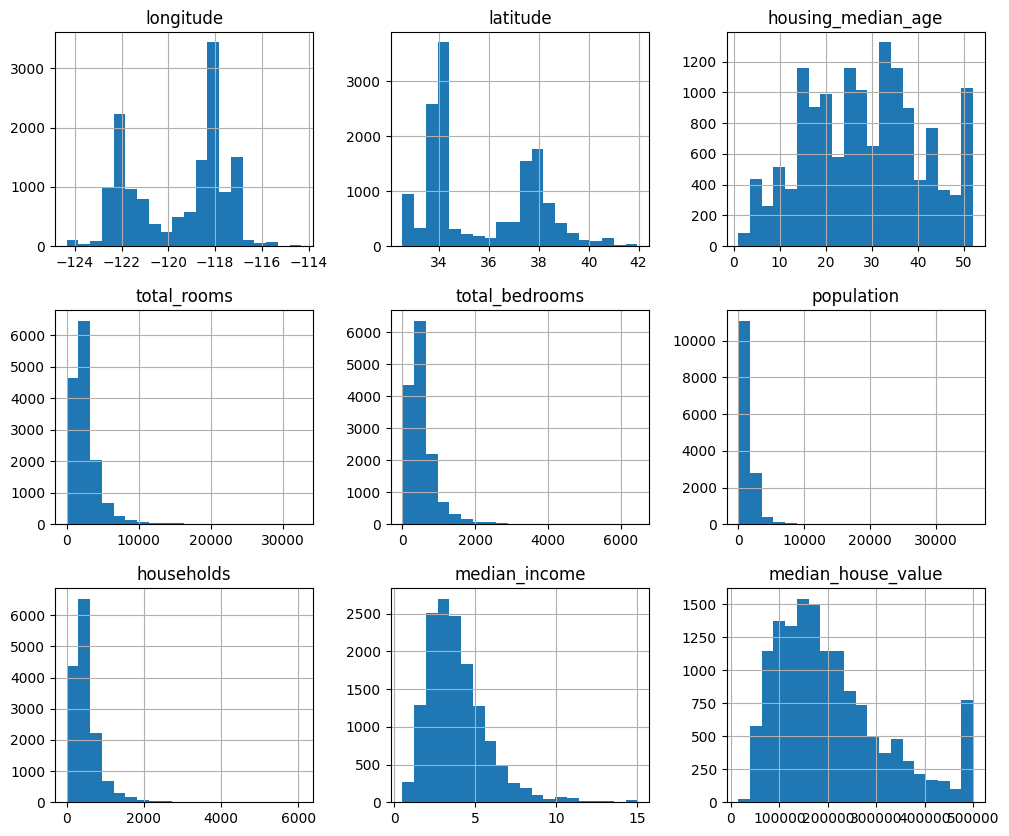

In [59]:
# Visualisasi histogram untuk fitur numerik
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
                      'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
df[numerical_features].hist(bins=20, figsize=(12,10))
plt.show()


Berdasarkan histplot diatas ditemukan jika distribusi data untuk masing-masing kolomnya tidak normal.

### **visualisasi spasial Latitude, Lingitude dan Median House Value**

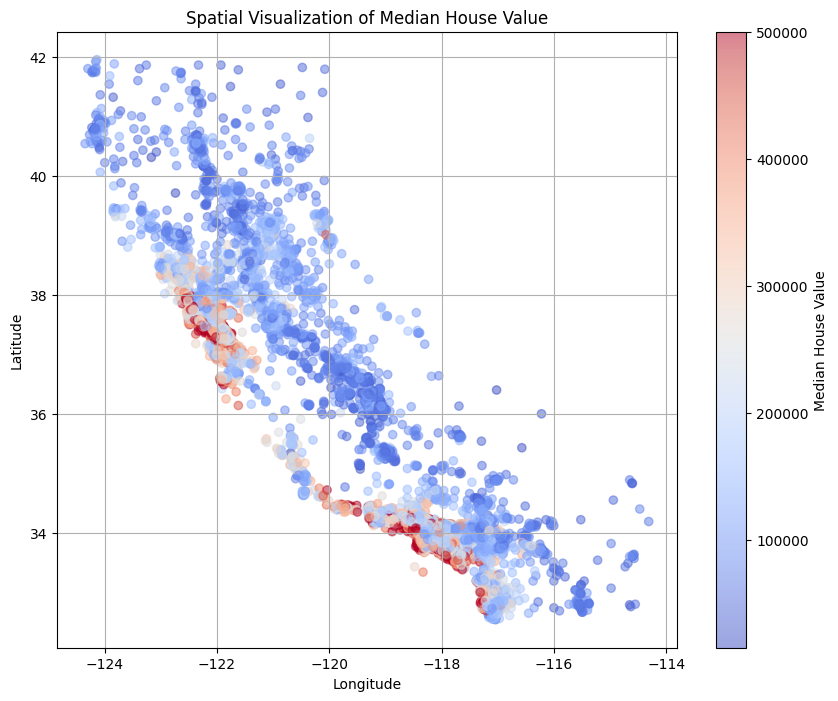

In [60]:
# Membuat scatter plot untuk visualisasi spasial
plt.figure(figsize=(10, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='coolwarm', alpha=0.5)
plt.colorbar(label='Median House Value')
plt.title('Spatial Visualization of Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


## **Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Melakukan pengecekan apakah tedapat data duplikat
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

#### **Duplicated Data**

In [61]:
df.duplicated().sum()

0

Tidak ada data yang duplikat

> Merubah Format kolom ocean_proximity menjadi category

In [62]:
# Periksa dan tangani format yang tidak sesuai pada fitur Ocean Proximity
df['ocean_proximity'] = df['ocean_proximity'].astype('category')

In [63]:
pd.set_option('display.max_rows', None)
infodata = pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_values': df.isna().mean().values * 100,
    'n_unique': df.nunique().values,
    'sample_unique': df.apply(lambda col: col.unique()).values,
})

infodata

,feature,data_type,null_values,n_unique,sample_unique
0,longitude,float64,0.000000,806,"[-119.79, -122.21, -118.04, -118.28, -119.81, ..."
1,latitude,float64,0.000000,836,"[36.73, 37.77, 33.87, 34.06, 33.8, 33.81, 38.6..."
2,housing_median_age,float64,0.000000,52,"[52.0, 43.0, 17.0, 50.0, 11.0, 14.0, 6.0, 10.0..."
3,total_rooms,float64,0.000000,5227,"[112.0, 1017.0, 2358.0, 2518.0, 772.0, 10535.0..."
4,total_bedrooms,float64,0.948228,1748,"[28.0, 328.0, 396.0, 1196.0, 194.0, 1620.0, 14..."
5,population,float64,0.000000,3498,"[193.0, 836.0, 1387.0, 3051.0, 606.0, 4409.0, ..."
6,households,float64,0.000000,1649,"[40.0, 277.0, 364.0, 1000.0, 167.0, 1622.0, 14..."
7,median_income,float64,0.000000,9797,"[1.975, 2.2604, 6.299, 1.7199, 2.2206, 6.67, 8..."
8,ocean_proximity,category,0.000000,5,"['INLAND', 'NEAR BAY', '<1H OCEAN', 'NEAR OCEA..."
9,median_house_value,float64,0.000000,3548,"[47500.0, 100000.0, 285800.0, 175000.0, 59200...."


#### **Handling Missing Value**

In [64]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [65]:
# mengecek missing value dalam bentuk %/persentase
df.isna().sum()/len(df)*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.948228
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
median_house_value    0.000000
dtype: float64

Terdapat 137 atau kurang lebih 0.9% nan values pada kolom total_bedrooms

In [66]:
df.dropna(subset='total_bedrooms', inplace=True)

#### **Statistik Deskriptif**

In [67]:
display(df.describe(), df.describe(include='category'))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000
mean,-119.567150,35.631365,28.609671,2640.917686,538.260709,1424.772273,499.480470,3.866774,206793.156942
std,2.006374,2.139589,12.606493,2197.192896,423.577544,1151.795857,383.826005,1.890866,115404.371629
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1452.000000,295.000000,784.000000,279.000000,2.569400,119400.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1164.000000,410.000000,3.540300,180000.000000
75%,-118.000000,37.715000,37.000000,3142.000000,647.000000,1722.000000,603.500000,4.736100,263750.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


,ocean_proximity
count,14311
unique,5
top,<1H OCEAN
freq,6300


Pada dataset terdapat sebanyak 14311 baris dan 10 kolom, yang berarti ada 14311 blok perumahan dan 10 fitur.

#### **Korelasi Antara Fitur Numerik**

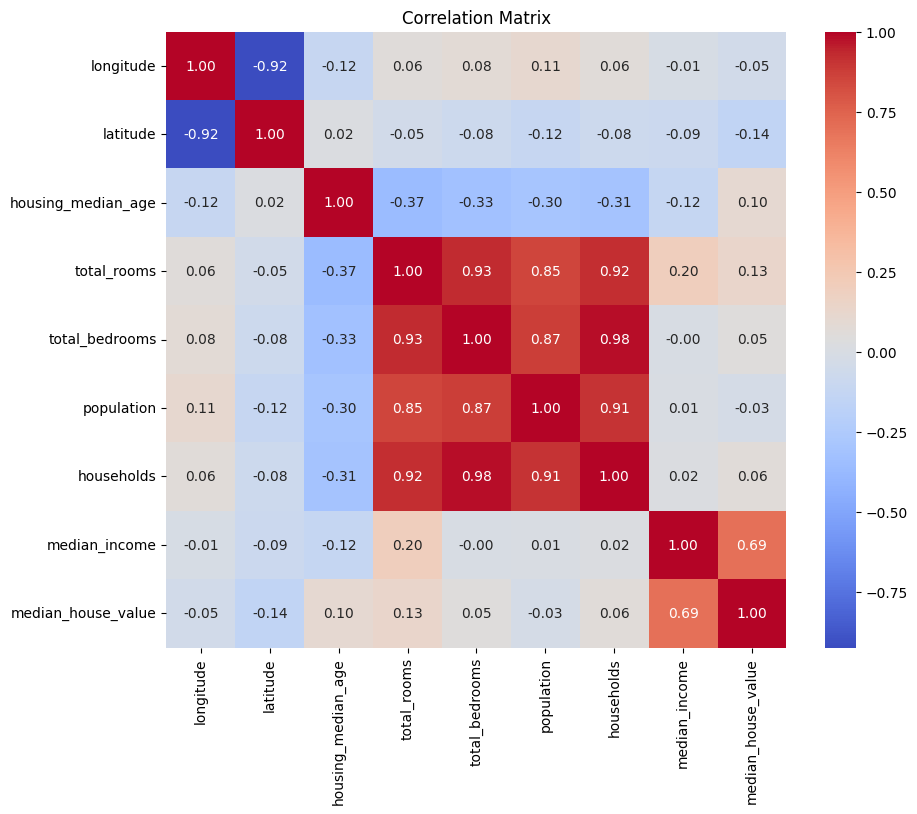

In [68]:
# Memilih hanya kolom numerik dari DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Menghitung matriks korelasi
correlation_matrix = numeric_df.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Matrix")
plt.show()

Berdasarkan analisis, ditemukan bahwa kolom yang paling berkorelasi dengan kolom median_house_value adalah median_income. Ini mengindikasikan bahwa ada hubungan positif yang cukup kuat antara tingkat pendapatan median penduduk di suatu daerah dengan nilai median rumah di daerah tersebut. Dengan kata lain, semakin tinggi pendapatan penduduk di suatu daerah, kemungkinan besar harga rumah di daerah tersebut juga akan meningkat.

### **Handling Kolom Ocean Proximity**

In [69]:
df['ocean_proximity'].unique()

['INLAND', 'NEAR BAY', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND']
Categories (5, object): ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [70]:
# Menghitung jumlah data untuk setiap nilai kategori dalam kolom 'ocean_proximity'
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     6300
INLAND        4544
NEAR OCEAN    1855
NEAR BAY      1610
ISLAND           2
Name: count, dtype: int64

Berdasarkan eksplorasi dataset, diketahui bahwa kategori 'ISLAND' dalam kolom ocean_proximity hanya memiliki 2 entri data. Jumlah yang sangat sedikit ini tidak cukup untuk digunakan dalam proses training, validation, dan testing model secara efektif. Dengan hanya dua baris data, informasi yang terkandung mungkin tidak cukup untuk menghasilkan prediksi yang akurat, terutama mengingat variasi besar dalam atribut lain dalam dataset. Oleh karena itu, menghapus kategori 'ISLAND' adalah keputusan yang masuk akal untuk menghindari overfitting dan memastikan keakuratan model.

In [71]:
df[df['ocean_proximity'] == 'ISLAND']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8303,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,ISLAND,414700.0
12680,-118.48,33.43,29.0,716.0,214.0,422.0,173.0,2.6042,ISLAND,287500.0


In [72]:
df.drop([8303, 12680], inplace=True)
df.reset_index(drop=True, inplace=True)

In [73]:
df[df['ocean_proximity'] == 'ISLAND']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value


In [74]:
# Menghitung jumlah data untuk setiap nilai kategori dalam kolom 'ocean_proximity'
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     6300
INLAND        4544
NEAR OCEAN    1855
NEAR BAY      1610
ISLAND           0
Name: count, dtype: int64

### **Median House Value**

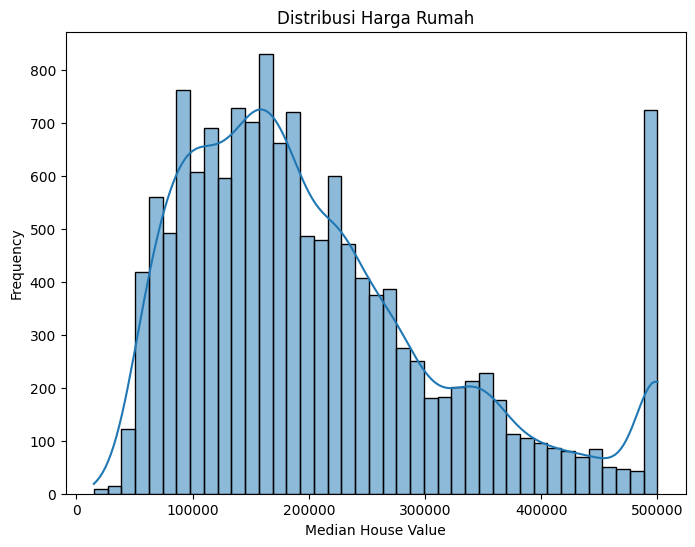

In [75]:
# Membuat histogram harga rumah
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='median_house_value', kde=True)
plt.title('Distribusi Harga Rumah')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()


Histogram menunjukkan bahwa distribusi data pada kolom median_house_value tidak mengikuti pola distribusi normal, melainkan memiliki skewness ke arah kanan.

### **Mengecek Outliers**

In [76]:
# Mencari nilai maksimum dan minimum dari kolom median_house_value
max_median_house_value = df['median_house_value'].max()
min_median_house_value = df['median_house_value'].min()

print("Nilai median_house_value maksimum:", max_median_house_value)
print("Nilai median_house_value minimum:", min_median_house_value)

Nilai median_house_value maksimum: 500001.0
Nilai median_house_value minimum: 14999.0


In [77]:
def find_outlier(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    limit = iqr * 1.5

    lower_bound = q1 - limit
    upper_bound = q3 + limit

    return lower_bound, upper_bound

In [78]:
# Mengumpulkan batas atas dan batas bawah untuk setiap fitur
outlier_bounds = {}
for feature in df.select_dtypes('number'):
    lower_bound, upper_bound = find_outlier(df, feature)
    outlier_bounds[feature] = (lower_bound, upper_bound)

# Identifikasi outlier dalam seluruh DataFrame
outliers = pd.DataFrame()
for feature, (lower_bound, upper_bound) in outlier_bounds.items():
    outlier_subset = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outliers = pd.concat([outliers, outlier_subset], axis=0)

# Hapus duplikat jika ada
outliers.drop_duplicates(inplace=True)

# Output batas atas dan batas bawah untuk setiap fitur
for feature, (lower_bound, upper_bound) in outlier_bounds.items():
    print(f"Feature: {feature}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}\n")

Feature: longitude
Lower Bound: -127.5
Upper Bound: -112.30000000000001

Feature: latitude
Lower Bound: 28.245
Upper Bound: 43.405

Feature: housing_median_age
Lower Bound: -10.5
Upper Bound: 65.5

Feature: total_rooms
Lower Bound: -1083.0
Upper Bound: 5677.0

Feature: total_bedrooms
Lower Bound: -233.0
Upper Bound: 1175.0

Feature: population
Lower Bound: -623.0
Upper Bound: 3129.0

Feature: households
Lower Bound: -208.5
Upper Bound: 1091.5

Feature: median_income
Lower Bound: -0.6806500000000009
Upper Bound: 7.986150000000001

Feature: median_house_value
Lower Bound: -97050.0
Upper Bound: 480150.0



In [79]:
# Hitung jumlah total outlier
total_outliers = outliers.shape[0]
total_data_points = df.shape[0]

# Hitung persentase outlier
percentage_outliers = (total_outliers / total_data_points) * 100

# Output ukuran DataFrame outlier
print("Total number of outliers:", total_outliers)
print("Percentage of outliers:", round(percentage_outliers, 2), "%")

Total number of outliers: 2079
Percentage of outliers: 14.53 %


In [80]:
# Menentukan outlier
outliers = df[(df['median_house_value'] < lower_bound) | (df['median_house_value'] > upper_bound)]

print("Batas bawah outlier:", lower_bound)
print("Batas atas outlier:", upper_bound)
print("Jumlah outlier:", len(outliers))

Batas bawah outlier: -97050.0
Batas atas outlier: 480150.0
Jumlah outlier: 751


In [81]:
cek_data = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households','median_income','median_house_value']]
cek_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,59200.0


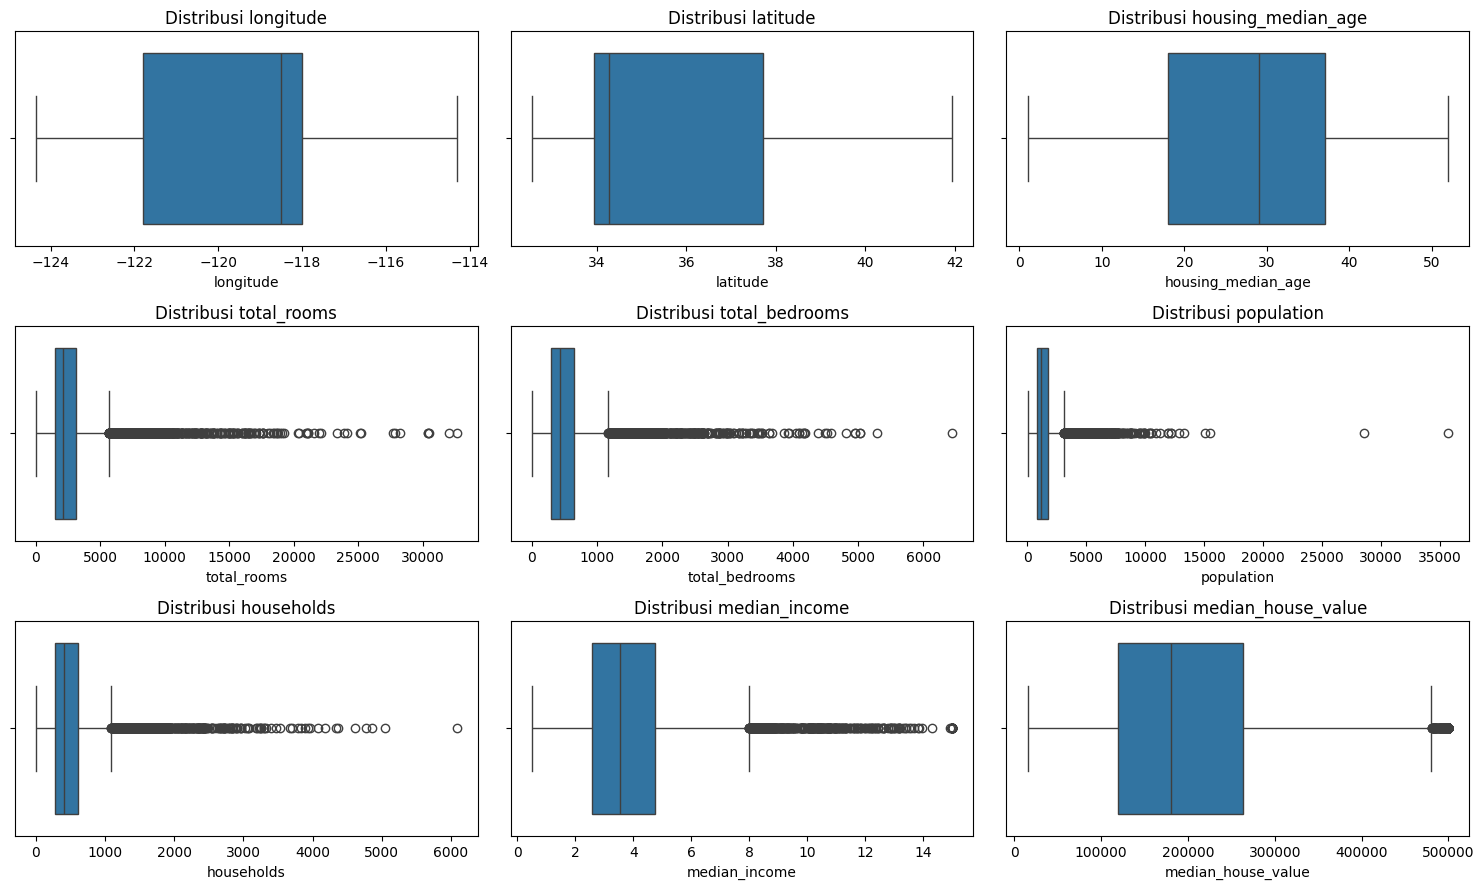

In [82]:
plt.figure(figsize=(15,9))
ax = 1
for kolom in cek_data:
    plt.subplot(3,3, ax)
    sns.boxplot(data=df, x=kolom)
    plt.title(f'Distribusi {kolom}')
    ax += 1

plt.tight_layout()
plt.show()

In [83]:
df.shape

(14309, 10)

Berdasarkan pengecekan, kita menemukan bahwa ada cukup banyak outlier dalam dataset kita, kurang lebih sekitar 14%. Ini cukup signifikan dan bisa berpengaruh pada kinerja model kita jika tidak ditangani dengan baik. Salah satu cara untuk mengatasi masalah ini adalah dengan menggunakan model yang lebih tahan terhadap outlier atau melakukan pembersihan data dengan cermat. Sebagai langkah awal, kita memutuskan untuk menghapus data yang memiliki outlier pada kolom target, yaitu 'median_house_value', agar prediksi model tidak terlalu terpengaruh. Ini berarti kita akan kehilangan sekitar 751 entri data, tetapi masih menyisakan 13.558 data yang bersih untuk analisis lebih lanjut.

## **Handling Outlier**



In [84]:
print("Jumlah outlier:", len(outliers))

Jumlah outlier: 751


dikarenakan outlier bepengaruh pada kinerja dan hasil prediksi model ka outlier tersebut dihapus

In [85]:
# Menghapus outlier
df_cleaned = df[(df['median_house_value'] >= lower_bound) & (df['median_house_value'] <= upper_bound)]

print("Jumlah baris sebelum penghapusan outlier:", len(df))
print("Jumlah baris setelah penghapusan outlier:", len(df_cleaned))

Jumlah baris sebelum penghapusan outlier: 14309
Jumlah baris setelah penghapusan outlier: 13558


In [86]:
df_cleaned.shape

(13558, 10)

In [87]:
# Simpan DataFrame yang telah dimodifikasi ke dalam file CSV baru
df.to_csv('data_california_house_cleaned.csv', index=False)

### **Feature Engineering**

Encoding:

1. One-hot Encoding : ocean_proximity

2. Standard Scaler : 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'

Dalam analisis regresi, terdapat beberapa metrik yang umumnya digunakan untuk mengevaluasi kinerja model regresi. Berikut adalah beberapa di antaranya:

1. Mean Squared Error (MSE): Ini adalah metrik yang paling umum digunakan untuk mengevaluasi performa model regresi. MSE mengukur rata-rata dari kuadrat selisih antara nilai sebenarnya dan nilai yang diprediksi oleh model.

2. Root Mean Squared Error (RMSE): Ini adalah akar kuadrat dari MSE, yang memberikan gambaran lebih intuitif tentang besarnya kesalahan model dalam unit yang sama dengan variabel target.

3. Mean Absolute Error (MAE): Ini adalah rata-rata dari nilai absolut dari selisih antara nilai sebenarnya dan nilai yang diprediksi oleh model.

4. Mean Absolute Percentage Error (MAPE): Ini adalah metrik yang mengukur rata-rata dari persentase selisih absolut antara nilai sebenarnya dan nilai yang diprediksi oleh model, dibandingkan dengan nilai sebenarnya.

Pada kasus kali ini, metrik yang digunakan untuk mengevaluasi model regresi adalah **MAPE** (Mean Absolute Percentage Error).

In [88]:
pd.set_option('display.max_rows', None)
infodata = pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'n_unique': df.nunique().values,
    'sample_unique': df.apply(lambda col: col.unique()).values,
})

infodata

,feature,data_type,n_unique,sample_unique
0,longitude,float64,806,"[-119.79, -122.21, -118.04, -118.28, -119.81, ..."
1,latitude,float64,835,"[36.73, 37.77, 33.87, 34.06, 33.8, 33.81, 38.6..."
2,housing_median_age,float64,52,"[52.0, 43.0, 17.0, 50.0, 11.0, 14.0, 6.0, 10.0..."
3,total_rooms,float64,5212,"[112.0, 1017.0, 2358.0, 2518.0, 772.0, 10535.0..."
4,total_bedrooms,float64,1748,"[28.0, 328.0, 396.0, 1196.0, 194.0, 1620.0, 14..."
5,population,float64,3491,"[193.0, 836.0, 1387.0, 3051.0, 606.0, 4409.0, ..."
6,households,float64,1646,"[40.0, 277.0, 364.0, 1000.0, 167.0, 1622.0, 14..."
7,median_income,float64,9726,"[1.975, 2.2604, 6.299, 1.7199, 2.2206, 6.67, 8..."
8,ocean_proximity,category,4,"['INLAND', 'NEAR BAY', '<1H OCEAN', 'NEAR OCEA..."
9,median_house_value,float64,3540,"[47500.0, 100000.0, 285800.0, 175000.0, 59200...."


### ***Feature* dan *Target***

In [89]:
# Pisahkan fitur dan target
X = df_cleaned.drop(columns=['median_house_value'])  # Fitur
y = df_cleaned['median_house_value']  # Target

In [90]:
# Tampilkan dimensi dari fitur dan target
print("Dimensi Fitur (X):", X.shape)
print("Dimensi Target (y):", y.shape)

Dimensi Fitur (X): (13558, 9)
Dimensi Target (y): (13558,)


### **Spliting Data**

In [91]:
# Split data menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42)

### **Encoding Pada Kolom *Feature***

In [92]:
# Tentukan kolom mana yang akan dienkoding dengan jenis tertentu
onehot_cols = ['ocean_proximity']
numeric_cols = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

# Definisikan transformer untuk setiap jenis enkoding dan penskalaan
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), onehot_cols),
        ('scaler', RobustScaler(), numeric_cols) 
    ], 
    remainder='passthrough'  # Biarkan kolom numerik tidak terpengaruh
)

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(),
                                 ['ocean_proximity']),
                                ('scaler', RobustScaler(),
                                 ['housing_median_age', 'total_rooms',
                                  'total_bedrooms', 'population', 'households',
                                  'median_income'])])

### **Pipeline Model**

In [93]:
# Definisikan model SVR
pipeline_svr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])

# Definisikan model Decision Tree
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor())
])

# Definisikan model KNN
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])

# Definisikan model Random Forest
pipeline_random_forest = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Definisikan model XGBoost
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor())
])


In [94]:
# List pipeline untuk iterasi
pipelines = [
    ('SVR', pipeline_svr),
    ('Decision Tree', pipeline_dt),
    ('KNN', pipeline_knn),
    ('Random Forest', pipeline_random_forest),
    ('XGBoost', pipeline_xgb)
]

In [95]:
# Fit ColumnTransformer pada data pelatihan
preprocessor.fit(X_train)

# Fit semua pipa jalur pada data pelatihan
for model_name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)

### **Modelling**

In [96]:
model_names = ["SVR", "Decision Tree", "KNN", "Random Forest", "XGBoost"]


# Lists to store scores, means, and standard deviations
scores = []
mean = []
std = []

# Iterate through each pipeline
for model_name, pipeline in pipelines:
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')
    
    # Convert scores to positive
    cv_scores = -cv_scores  # Negate the scores
    scores.append(cv_scores)
    
    # Calculate mean and standard deviation of scores
    mean.append(cv_scores.mean())
    std.append(cv_scores.std())

results_df = pd.DataFrame({
    'Model': model_names,
    'Mean MAPE': mean,
    'Standard deviation MAPE': std
})

# Printing DataFrame
results_df

,Model,Mean MAPE,Standard deviation MAPE
0,SVR,0.505406,0.011564
1,Decision Tree,0.249718,0.005242
2,KNN,0.211866,0.005550
3,Random Forest,0.187366,0.004635
4,XGBoost,0.179252,0.004381


### **Predict train set using 3 best model before tunning**

#### **KNN**

In [97]:
# Lakukan prediksi menggunakan model KNN sebelum tuning
y_pred_knn_before = pipeline_knn.predict(X_test)

print("Prediksi menggunakan model KNN sebelum tuning:")
print(y_pred_knn_before)

Prediksi menggunakan model KNN sebelum tuning:
[196980. 184640. 198780. ...  84000. 182440. 151740.]


#### **Random Forest**

In [98]:
# Lakukan prediksi menggunakan model Random Forest sebelum tuning
y_pred_rf_before = pipeline_random_forest.predict(X_test)

print("Prediksi menggunakan model Random Forest sebelum tuning:")
print(y_pred_rf_before)

Prediksi menggunakan model Random Forest sebelum tuning:
[165628. 178250. 204411. ... 107197. 148055. 175983.]


#### **XGBoost**

In [99]:

# Lakukan prediksi menggunakan model XGBoost sebelum tuning
y_pred_xgb_before = pipeline_xgb.predict(X_test)

print("Prediksi menggunakan model XGBoost sebelum tuning:")
print(y_pred_xgb_before)

Prediksi menggunakan model XGBoost sebelum tuning:
[175894.86 160015.98 191010.9  ... 110502.92 166399.7  191342.12]


#### **Evaluation Before Tunning**

In [139]:
# Definisi fungsi MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Hitung MAE untuk setiap model
mae_scores = {
    'KNN': mean_absolute_error(y_test, y_pred_knn_before),
    'Random Forest': mean_absolute_error(y_test, y_pred_rf_before),
    'XGBoost': mean_absolute_error(y_test, y_pred_xgb_before)
}

# Hitung MAPE untuk setiap model
mape_scores = {
    'KNN': mean_absolute_percentage_error(y_test, y_pred_knn_before),
    'Random Forest': mean_absolute_percentage_error(y_test, y_pred_rf_before),
    'XGBoost': mean_absolute_percentage_error(y_test, y_pred_xgb_before)
}

# Membuat DataFrame
evaluation_df = pd.DataFrame({'Model': list(mae_scores.keys()),
                            #   'MAE Sebelum Tuning': list(mae_scores.values()),
                              'Predict MAPE Sebelum Tuning': list(mape_scores.values())})

# Menampilkan DataFrame
evaluation_df

,Model,Predict MAPE Sebelum Tuning
0,KNN,20.628327
1,Random Forest,18.590207
2,XGBoost,17.277983


#### **Conclusion Model Benchmarking**

Berdasarkan evaluasi model menggunakan metrik Mean Absolute Percentage Error (MAPE), model XGBoost menunjukkan kinerja terbaik dengan rata-rata MAPE 0.179 dan standar deviasi MAPE 0.004, menunjukkan tingkat kesalahan yang paling rendah dan konsistensi dalam prediksinya dibandingkan dengan model-model lainnya seperti SVR, Decision Tree, KNN, dan Random Forest. Karena itu, kami merekomendasikan penggunaan XGBoost untuk memprediksi harga rumah dalam dataset ini. Selain itu, untuk proses tuning hyperparameter, disarankan untuk menggunakan model yang telah ditransformasi. Dengan cara ini, kualitas prediksi model dapat ditingkatkan dan kesalahan dalam estimasi dapat dikurangi, menghasilkan hasil yang lebih akurat secara keseluruhan.

## **HYPERPARAMETER TUNING**

### **Tunning XGBoost**

In [106]:
# Define custom MAPE scorer function
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Make it a scorer
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Parameter distribution for XGBoost
param_dist_xgb = {
    'regressor__n_estimators': [100, 200, 300, 400],
    'regressor__max_depth': [3, 5, 7, 9],
    'regressor__learning_rate': [0.05, 0.1, 0.2, 0.3],
    'regressor__min_child_weight': [1, 3, 5, 7],
    'regressor__gamma': [0, 0.1, 0.2, 0.3],
    'regressor__subsample': [0.8, 0.9, 1.0],
    'regressor__colsample_bytree': [0.8, 0.9, 1.0],
}

# Initialize XGBoost pipeline
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor())
])

# Initialize RandomizedSearchCV with custom MAPE scoring
random_search_xgb = RandomizedSearchCV(pipeline_xgb, param_dist_xgb, n_iter=100, cv=5, scoring=mape_scorer, random_state=42)

# Fit the randomized search
random_search_xgb.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters for XGBoost:", random_search_xgb.best_params_)
print("Best MAPE score for XGBoost:", -random_search_xgb.best_score_)

Best parameters for XGBoost: {'regressor__subsample': 0.8, 'regressor__n_estimators': 300, 'regressor__min_child_weight': 5, 'regressor__max_depth': 9, 'regressor__learning_rate': 0.05, 'regressor__gamma': 0.3, 'regressor__colsample_bytree': 0.8}
Best MAPE score for XGBoost: 16.911634510598056


### **Tunning Random Forest**

In [107]:
# Parameter distribution for Random Forest
param_dist_rf = {
    'regressor__n_estimators': [100, 200, 300, 400],
    'regressor__max_features': ['auto', 'sqrt'],
    'regressor__max_depth': [10, 20, 30, 40, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__bootstrap': [True, False]
}

# Initialize Random Forest pipeline
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(pipeline_rf, param_dist_rf, n_iter=40, cv=5, scoring='neg_mean_absolute_percentage_error', random_state=42)

# Fit the randomized search
random_search_rf.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters for Random Forest:", random_search_rf.best_params_)
print("Best MAPE score for Random Forest:", -random_search_rf.best_score_)


Best parameters for Random Forest: {'regressor__n_estimators': 300, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 'sqrt', 'regressor__max_depth': None, 'regressor__bootstrap': False}
Best MAPE score for Random Forest: 0.18643254089069364


### **Tunning KNN**

In [108]:
# Parameter distribution for KNN
param_dist_knn = {
    'regressor__n_neighbors': [3, 5, 7, 9, 11],  # Menentukan jumlah tetangga
    'regressor__weights': ['uniform', 'distance'],  # Menentukan metode pembobotan
    'regressor__p': [1, 2]  # Menentukan metrik jarak (1 untuk Manhattan, 2 untuk Euclidean)
}

# Initialize KNN pipeline
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])

# Initialize RandomizedSearchCV
random_search_knn = RandomizedSearchCV(pipeline_knn, param_dist_knn, n_iter=40, cv=5, scoring='neg_mean_absolute_percentage_error', random_state=42)

# Fit the randomized search
random_search_knn.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters for KNN:", random_search_knn.best_params_)
print("Best MAPE score for KNN:", -random_search_knn.best_score_)


Best parameters for KNN: {'regressor__weights': 'distance', 'regressor__p': 1, 'regressor__n_neighbors': 7}
Best MAPE score for KNN: 0.20480524105926895


In [140]:
# Collecting results for XGBoost
xgb_results = {
    "Model": "XGBoost",
    "Best Parameters": [random_search_xgb.best_params_],
    "Best MAPE Score": [-random_search_xgb.best_score_]
}

# Collecting results for Random Forest
rf_results = {
    "Model": "Random Forest",
    "Best Parameters": [random_search_rf.best_params_],
    "Best MAPE Score": [-random_search_rf.best_score_]
}

# Collecting results for KNN
knn_results = {
    "Model": "KNN",
    "Best Parameters": [random_search_knn.best_params_],
    "Best MAPE Score": [-random_search_knn.best_score_]
}

# Combine results into a DataFrame
results_df = pd.DataFrame([xgb_results, rf_results, knn_results])

# Print the DataFrame
results_df

,Model,Best Parameters,Best MAPE Score
0,XGBoost,"[{'regressor__subsample': 0.8, 'regressor__n_e...",[16.911634510598056]
1,Random Forest,"[{'regressor__n_estimators': 300, 'regressor__...",[0.18643254089069364]
2,KNN,"[{'regressor__weights': 'distance', 'regressor...",[0.20480524105926895]


In [141]:
# Lakukan prediksi menggunakan model terbaik XGBoost yang telah dituning
y_pred_xgb_after_tunning = random_search_xgb.best_estimator_.predict(X_test)

# Tampilkan hasil prediksi
print("Prediksi menggunakan model XGBoost:")
print(y_pred_xgb_after_tunning)


Prediksi menggunakan model XGBoost:
[180409.58  172481.1   184612.52  ... 111465.195 147924.84  173149.08 ]


In [112]:
# Lakukan prediksi menggunakan model terbaik Random Forest yang telah dituning
y_pred_rf_after_tunning = random_search_rf.best_estimator_.predict(X_test)

# Tampilkan hasil prediksi
print("Prediksi menggunakan model Random Forest:")
print(y_pred_rf_after_tunning)


Prediksi menggunakan model Random Forest:
[192483.         171167.33333333 201777.         ... 105188.33333333
 146270.         169859.33333333]


In [113]:
# Lakukan prediksi menggunakan model terbaik KNN yang telah dituning
y_pred_knn_after_tunning = random_search_knn.best_estimator_.predict(X_test)

# Tampilkan hasil prediksi
print("Prediksi menggunakan model KNN:")
print(y_pred_knn_after_tunning)

Prediksi menggunakan model KNN:
[196515.8137494  162416.07136148 198407.05752941 ...  83793.95757595
 173670.87074755 173531.97872457]


In [142]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn_after_tunning)

mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf_after_tunning)

# Calculate MAPE for XGBoost predictions
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb_after_tunning)

mape_scores = {
    "Model": ["KNN","Random Forest","XGBoost" ],
    "Predict MAPE Score Setelah Tunning": [mape_knn,mape_rf, mape_xgb]
}

mape_df = pd.DataFrame(mape_scores)

mape_df

,Model,Predict MAPE Score Setelah Tunning
0,KNN,19.787317
1,Random Forest,18.426673
2,XGBoost,16.415074


## **Evaluation**

Evaluasi model yang dibangun dilakukan dengan membandingkan metrik hasil prediksi model dengan model yang sudah dituning dan belum ditunning.

### **Comparison Metric training datasets Before After Tunning.**

In [144]:
comparison_df = pd.DataFrame({
    "Model": ["KNN","Random Forest","XGBoost"],
    "MAPE Score Sebelum Tuning": evaluation_df["Predict MAPE Sebelum Tuning"],
    "MAPE Score Setelah Tuning": mape_df["Predict MAPE Score Setelah Tunning"]
})

comparison_df

,Model,MAPE Score Sebelum Tuning,MAPE Score Setelah Tuning
0,KNN,20.628327,19.787317
1,Random Forest,18.590207,18.426673
2,XGBoost,17.277983,16.415074


#### **Comparison Metric Prediction Before After Tunning**

In [145]:
# Merge DataFrame for comparison of prediction metrics before and after tuning
comparison_metric_df = pd.merge(evaluation_df, mape_df, on="Model", suffixes=("_Before_Tuning", "_After_Tuning"))

# Menampilkan DataFrame untuk perbandingan metrik prediksi
comparison_metric_df

,Model,Predict MAPE Sebelum Tuning,Predict MAPE Score Setelah Tunning
0,KNN,20.628327,19.787317
1,Random Forest,18.590207,18.426673
2,XGBoost,17.277983,16.415074


Jika dibandingkan, maka perubahan skor metrik model setelah proses tuning adalah sebagai berikut:

1. Sebelum penyetelan model, KNN memiliki MAPE sebesar 20.63%, yang kemudian berhasil ditingkatkan menjadi 19.79% setelah dilakukan penyetelan. Ini menunjukkan peningkatan kinerja model setelah penyetelan.

2. Random Forest sebelum penyetelan memiliki MAPE sebesar 18.59%, yang kemudian mengalami penurunan menjadi 18.43% setelah penyetelan. Meskipun penurunan ini tidak signifikan, namun model ini tetap mengalami sedikit perbaikan setelah penyetelan.

3. XGBoost adalah model dengan peningkatan kinerja yang paling signifikan setelah penyetelan. Sebelum penyetelan, model ini memiliki MAPE sebesar 17.28%, yang kemudian menurun menjadi kurang lebih 16.42% setelah penyetelan. Ini menunjukkan bahwa penyetelan model sangat berhasil meningkatkan kinerja XGBoost secara signifikan.

### **Residual Plot**

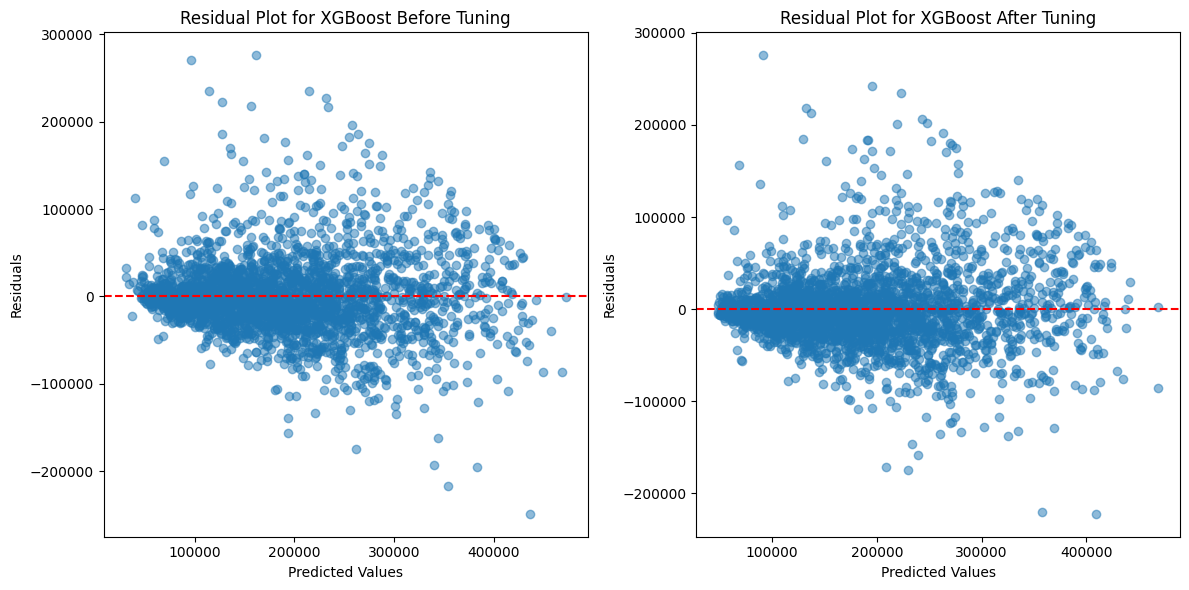

In [ ]:
# Hitung residu untuk model XGBoost sebelum tuning
residuals_xgb_before = y_test - y_pred_xgb_before
residuals_xgb_after = y_test - y_pred_xgb_after_tunning

# Plot residual sebelum tuning
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_pred_xgb_before, residuals_xgb_before, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for XGBoost Before Tuning')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Plot residual setelah tuning
plt.subplot(1, 2, 2)
plt.scatter(y_pred_xgb_after_tunning, residuals_xgb_after, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for XGBoost After Tuning')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

Meskipun terdapat peningkatan kinerja pada model setelah melakukan tunning, perbaikan tersebut mungkin tidak cukup signifikan untuk secara jelas terlihat dalam plot hasil prediksi dan plot residu. Dengan kata lain, meskipun model telah ditingkatkan, perbedaan dalam prediksi sebenarnya mungkin sulit dikenali secara visual.

## **Feature Importance**

In [ ]:
# Get the best estimator from the RandomizedSearchCV
best_estimator_xgb = random_search_xgb.best_estimator_

# Get the feature importances from the XGBoost regressor within the best estimator
feature_importances = best_estimator_xgb.named_steps['regressor'].feature_importances_

# Print feature importances
print("Feature Importances:")
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance}")


Feature Importances:
longitude: 0.056848786771297455
latitude: 0.5612402558326721
housing_median_age: 0.04264099895954132
total_rooms: 0.08873350918292999
total_bedrooms: 0.01588752306997776
population: 0.014602559618651867
households: 0.01179862953722477
median_income: 0.015446122735738754
ocean_proximity: 0.012147003784775734


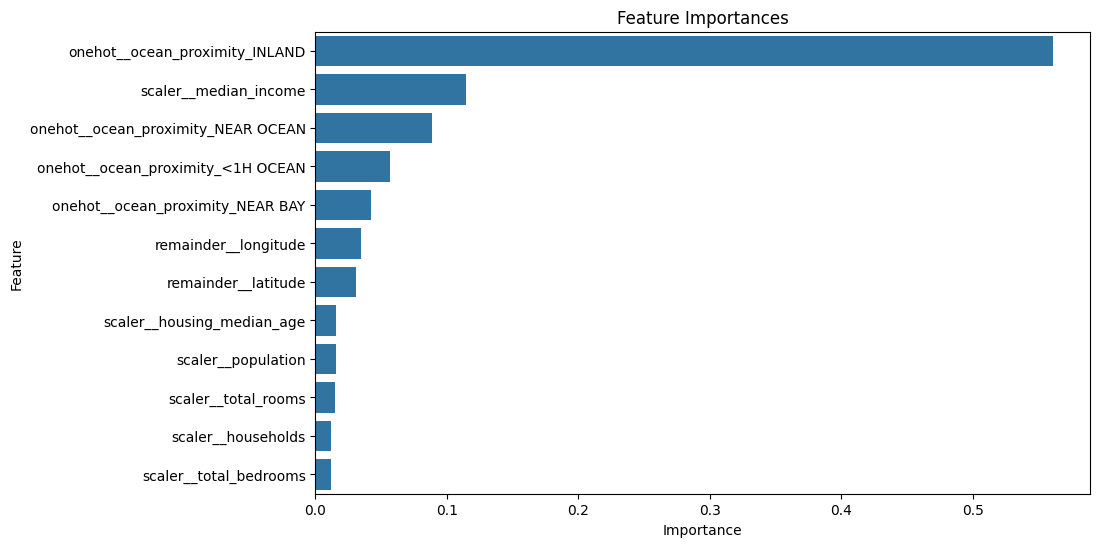

In [ ]:
# Get the best estimator from the RandomizedSearchCV
best_estimator_xgb = random_search_xgb.best_estimator_

# Get feature names after preprocessing
feature_names = best_estimator_xgb.named_steps['preprocessor'].get_feature_names_out()

# Get the feature importances from the XGBoost regressor within the best estimator
feature_importances = best_estimator_xgb.named_steps['regressor'].feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## **Conclusion**

Maka dapat disimpulkan bahwa:

1. Diantara 5 model regresi yang diujikan, **XGBoost** adalah algoritma pemodelan yang paling baik dalam memprediksi nilai rumah dari dataset *california_housing_price.csv*

2. Berdasarkan evaluasi model menggunakan metrik Mean Absolute Percentage Error (MAPE), ditemukan bahwa setelah melakukan hyperparameter tuning, terjadi peningkatan kinerja pada semua model yang dievaluasi, yaitu KNN, Random Forest, dan XGBoost. Berikut adalah kesimpulan dari hasil evaluasi tersebut:

    - KNN: Setelah dilakukan tuning, model KNN mengalami penurunan MAPE sebesar 0.84%, dari sebelumnya 20.63% menjadi 19.79%. Meskipun penurunan ini tidak terlalu signifikan secara visual, namun menunjukkan adanya peningkatan kinerja model dalam memprediksi harga listing.

    - Random Forest: Model Random Forest juga mengalami peningkatan kinerja setelah tuning, dengan penurunan MAPE sebesar 0.16%, dari 18.59% menjadi 18.43%. Meskipun perbaikan ini kecil, namun menunjukkan bahwa tuning parameter dapat memberikan efek positif terhadap kinerja model.

    - XGBoost: Model XGBoost menunjukkan peningkatan kinerja yang paling signifikan setelah dilakukan tuning. Terjadi penurunan MAPE sebesar 0.86%, dari 17.28% menjadi 16.42%. Penurunan MAPE yang cukup besar ini menunjukkan bahwa tuning parameter telah berhasil mengoptimalkan model XGBoost secara efektif.

3. Feature Importance yang paling mempengaruhi hasil prediksi:
    - Median Income Penduduk di kawasan tersebut.
    - Lokasi (Terutama rumah di daerah Daratan/Jauh dari Pesisir pantai) **INLAND**.
4. Model **XGBoost Regressor dengan parameter('regressor__subsample': 0.8, 'regressor__n_estimators': 300, 'regressor__min_child_weight': 5, 'regressor__max_depth': 9, 'regressor__learning_rate': 0.05, 'regressor__gamma': 0.3, 'regressor__colsample_bytree': 0.8)** menunjukan hasil `MAPE` lebih kecil dibandingkan 4 model lainnya.


## **Recommendation**

Berikut adalah rekomendasi untuk pengembangan model selanjutnya:

1. Optimasi Fitur: Selain tuning parameter model, perlu juga untuk mempertimbangkan optimasi fitur. Fitur-fitur yang memiliki pengaruh signifikan terhadap prediksi, seperti Median Income dan Lokasi, sebaiknya tetap dipertahankan dan bahkan bisa dieksplorasi lebih lanjut untuk mengekstrak informasi yang lebih detail.
2. Meningkatkan **kompleksitas model**, dengan menambahkan parameter pada saat tuning atau menggunakan algoritma yang lebih canggih

3. menjelajahi lebih lanjut tentang interpretasi model, seperti SHAP values atau partial dependence plots, untuk memahami bagaimana fitur-fitur tertentu memengaruhi prediksi Anda.

## **Save Model**

In [ ]:
# Impor modul joblib
from joblib import dump

# Simpan model XGBoost yang telah dituning
best_model_xgb = random_search_xgb.best_estimator_
dump(best_model_xgb, 'best_model_xgboost.joblib')


In [ ]:
import pickle

# Define the filename for saving the model
filename = 'california_house_model.sav'

# Save the entire pipeline including preprocessing and XGBoost model
pickle.dump(best_estimator_xgb, open(filename, 'wb'))


In [ ]:
# Load the model
loaded_model = pickle.load(open(filename, 'rb'))
